# Exploratory Data Analysis (EDA) on the Titanic Dataset

## Import Libraries

In [14]:
# Imports: pandas for data management, matplotlib & seaborn for visualizations.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Titanic Dataset

In [15]:
data = pd.read_csv('Titanic-Dataset.csv')

## Data Preview

In [16]:
# 2. Show raw data.head() gives first five rows for context.
print("First five rows of the dataset:")
display(data.head())

First five rows of the dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Generate summary statistics (mean, median, std, etc.).
### Summary Stats: describe() quickly shows central tendency and spread.

In [17]:
# Summary statistics for numeric features
print("\nSummary statistics for numeric features:")
display(data.describe())


Summary statistics for numeric features:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 2. Create histograms and boxplots for numeric features

## Histograms: Show feature distributions and possible multimodality.

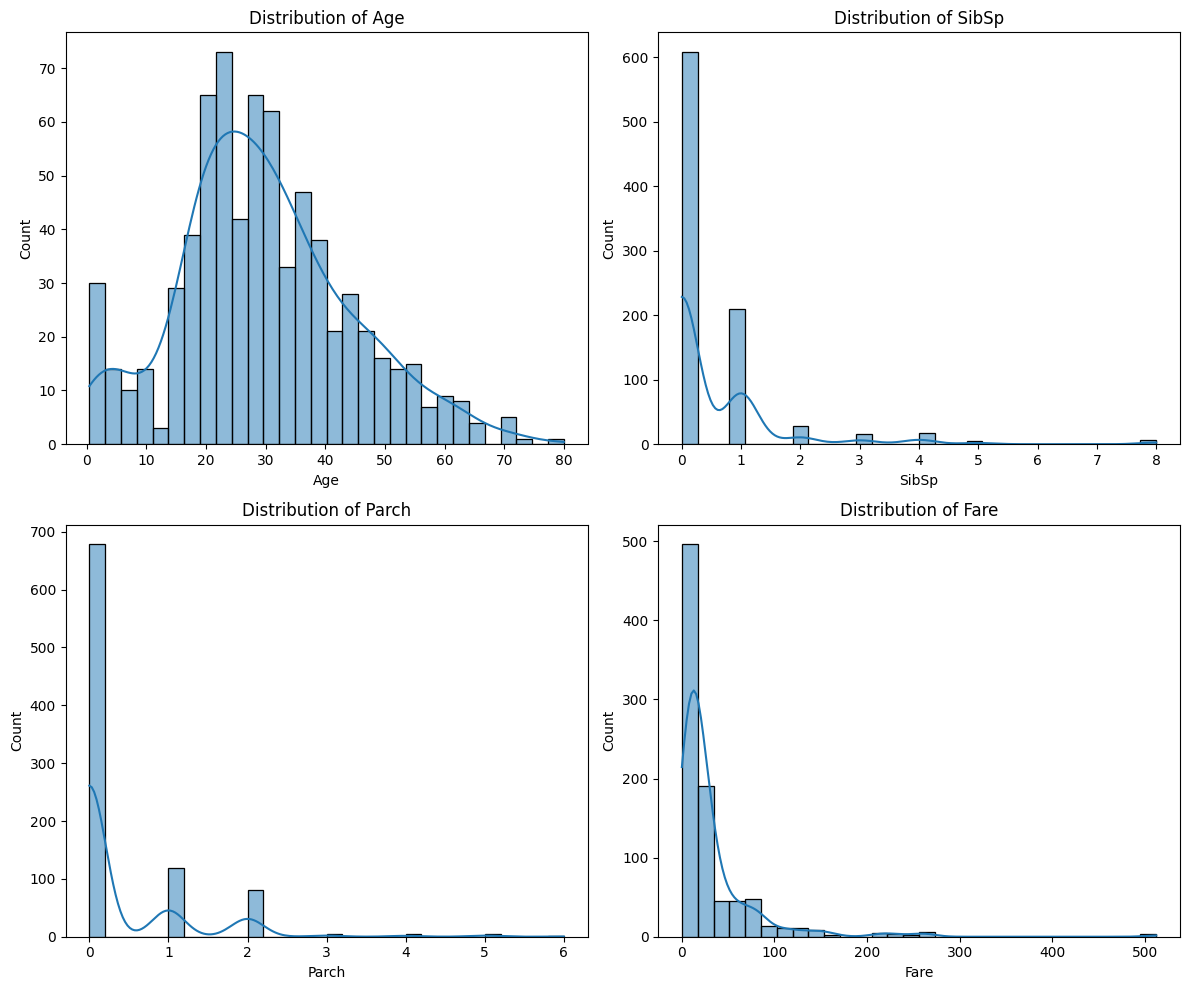

In [18]:
# Histograms for numeric features
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
plt.figure(figsize=(12, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[feature].dropna(), bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.savefig('histograms.png')
plt.show()

## Boxplots: Make outliers and spread visual.

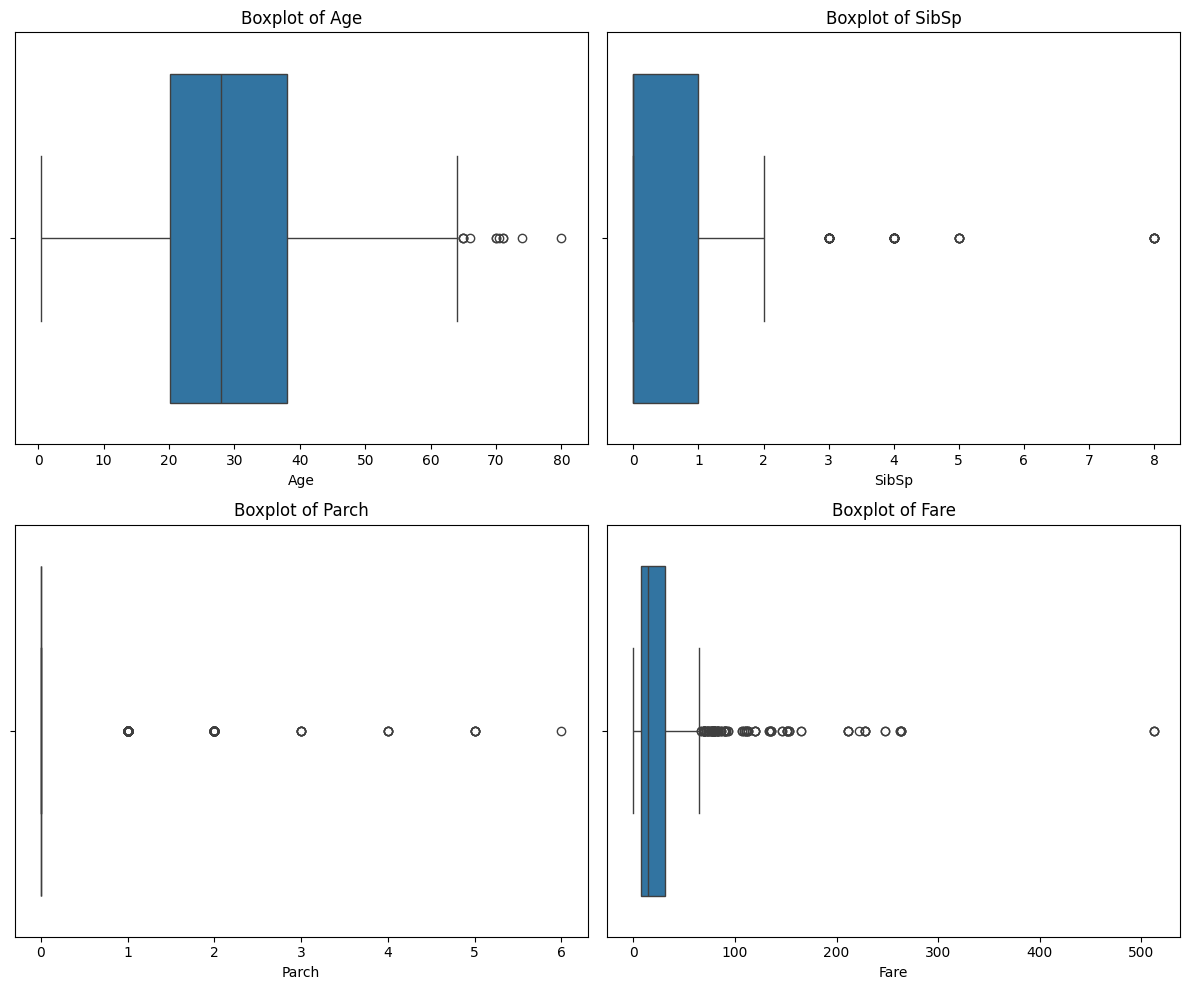

In [19]:
# Boxplots for numeric features
plt.figure(figsize=(12, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[feature].dropna())
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.savefig('boxplots.png')
plt.show()

## 3. Use correlation matrix for feature relationships.


In [20]:
# Correlation Matrix: Reveals linear relationships between features.

corr = data[numeric_features + ['Survived']].corr()
print("\nCorrelation matrix:\n", corr)


Correlation matrix:
                Age     SibSp     Parch      Fare  Survived
Age       1.000000 -0.308247 -0.189119  0.096067 -0.077221
SibSp    -0.308247  1.000000  0.414838  0.159651 -0.035322
Parch    -0.189119  0.414838  1.000000  0.216225  0.081629
Fare      0.096067  0.159651  0.216225  1.000000  0.257307
Survived -0.077221 -0.035322  0.081629  0.257307  1.000000


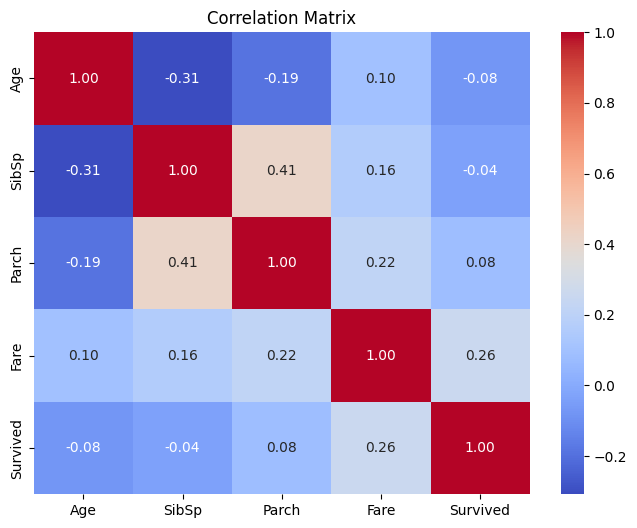

In [21]:
# Heatmap produced for clarity.

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()

## 4. Identify patterns, trends, or anomalies in the data

## 5. Make basic feature-level inferences from visuals.


In [22]:
# Basic feature-level inference (patterns/trends/anomalies)
# Pattern Analysis: Prints means, medians, skewness direction, and number of outliers for each numeric feature.

print('\nData Skew and Outliers Observations:')
for feature in numeric_features:
    print(f"{feature}: mean={data[feature].mean():.2f}, median={data[feature].median():.2f}")


Data Skew and Outliers Observations:
Age: mean=29.70, median=28.00
SibSp: mean=0.52, median=0.00
Parch: mean=0.38, median=0.00
Fare: mean=32.20, median=14.45


In [23]:
    # Detect skew
    skew = data[feature].skew()
    print(f"  Skewness: {skew:.2f} ({'right' if skew > 0.5 else 'left' if skew < -0.5 else 'approximately symmetrical'})")

  Skewness: 4.79 (right)


In [24]:
    # Outlier detection (using IQR rule)
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[feature] < Q1 - 1.5 * IQR) | (data[feature] > Q3 + 1.5 * IQR)][feature]
    print(f"  Outliers detected: {len(outliers)}")


  Outliers detected: 116
